In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.image as mpimg
from pylab import rcParams
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K

Using TensorFlow backend.


In [2]:
%matplotlib inline

sns.set(style='white', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 8

np.random.seed(42)

# What Neural Nets see?

In [3]:
cat = mpimg.imread('cat.jpg')

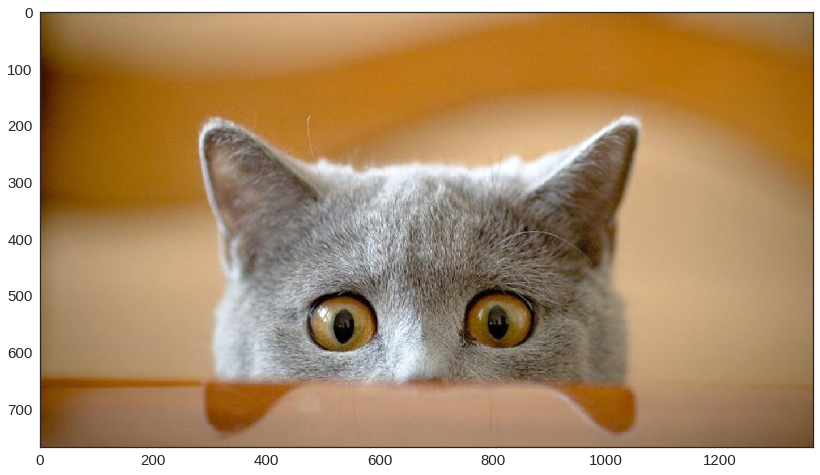

In [4]:
plt.imshow(cat);

In [5]:
def visualize_cat(model, cat):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    cat_batch = np.expand_dims(cat.copy(), axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    plt.imshow(conv_cat)

In [6]:
cat.shape

(768, 1366, 3)

(766, 1364, 3)


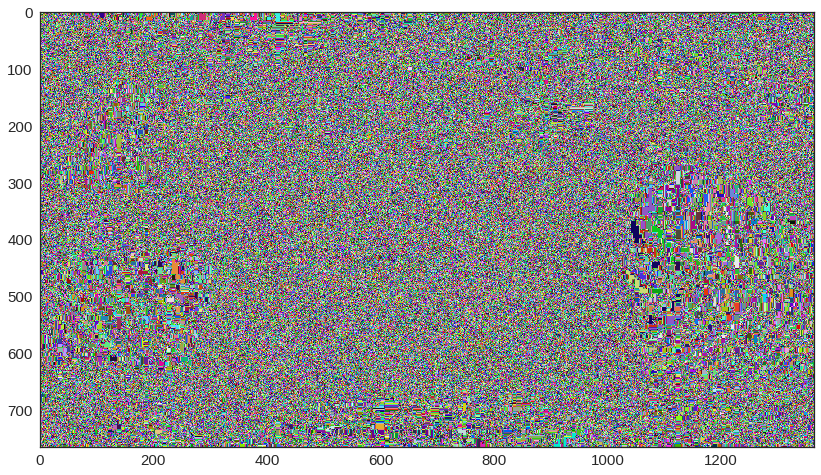

In [7]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))

visualize_cat(model, cat)

(759, 1357, 3)


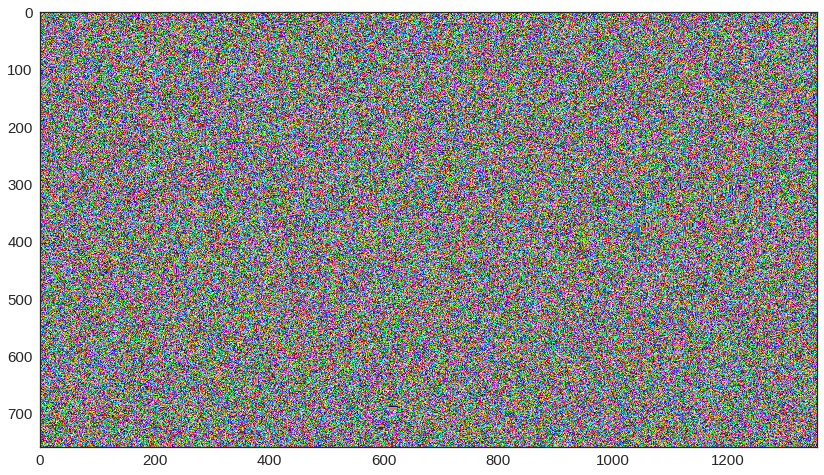

In [8]:
model = Sequential()
model.add(Conv2D(3, (10, 10), input_shape=cat.shape))

visualize_cat(model, cat)

In [9]:
def pretty_print_cat(model, cat):
    cat_batch = np.expand_dims(cat.copy(), axis=0)
    conv_cat2 = model.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])

    print(conv_cat2.shape)
    plt.imshow(conv_cat2)

(766, 1364, 1)
(766, 1364)


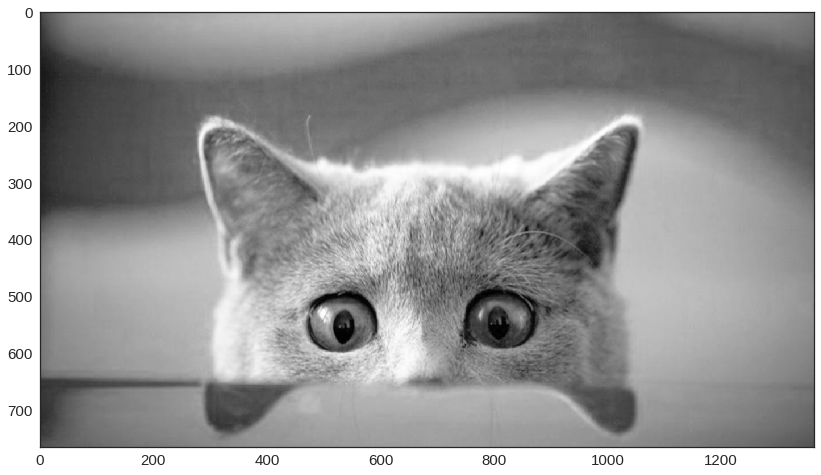

In [10]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=cat.shape))

pretty_print_cat(model, cat)

(757, 1355, 1)
(757, 1355)


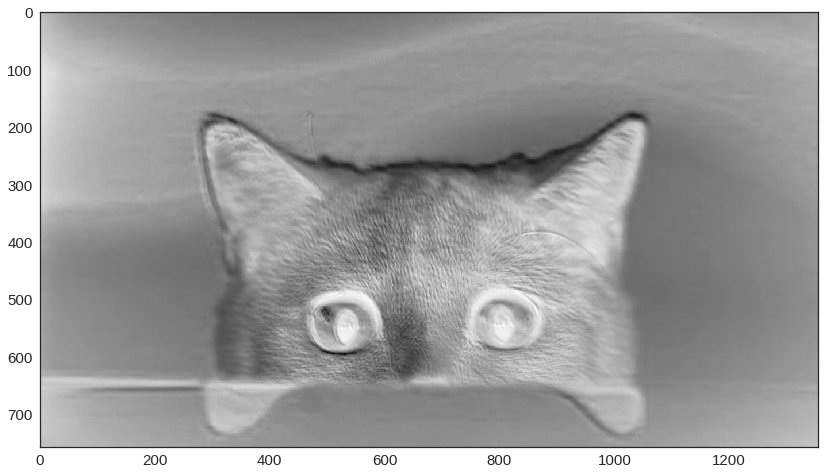

In [11]:
model = Sequential()
model.add(Conv2D(1, (12, 12), input_shape=cat.shape))

pretty_print_cat(model, cat)

## Let's try with activation function

(766, 1364, 1)
(766, 1364)


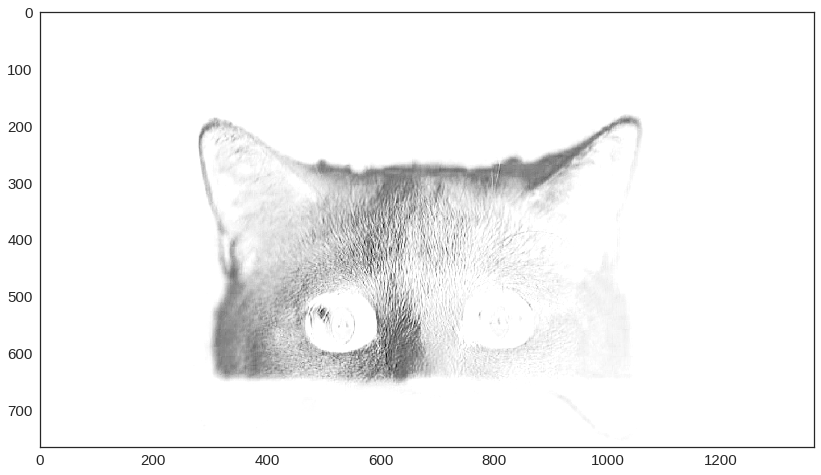

In [55]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))

pretty_print_cat(model, cat)

(766, 1364, 3)


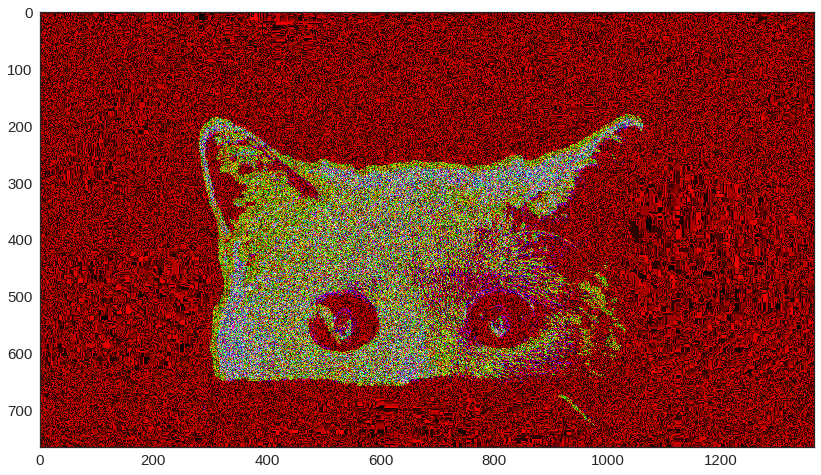

In [60]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))

visualize_cat(model, cat)

# Max Pooling

(255, 454, 1)
(255, 454)


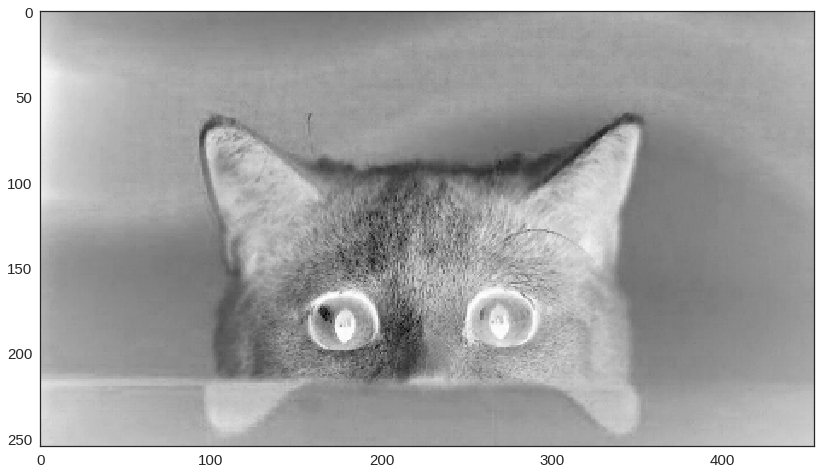

In [61]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

pretty_print_cat(model, cat)

(255, 454, 3)


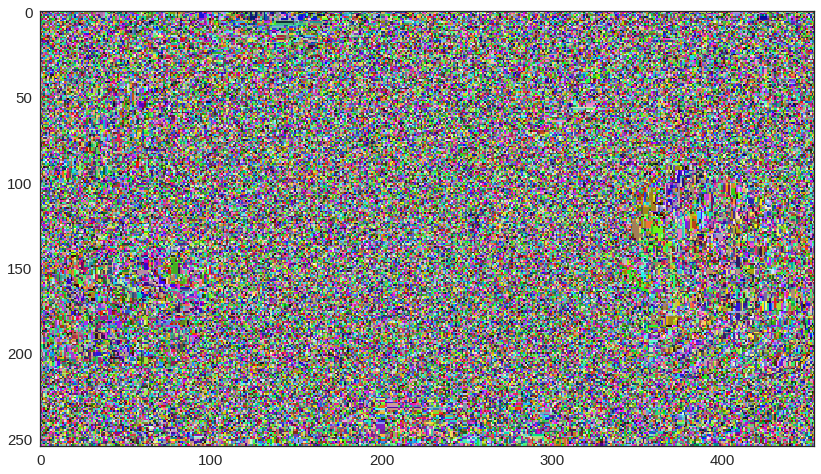

In [69]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

visualize_cat(model, cat)

# Activation and Pooling

(255, 454, 1)
(255, 454)


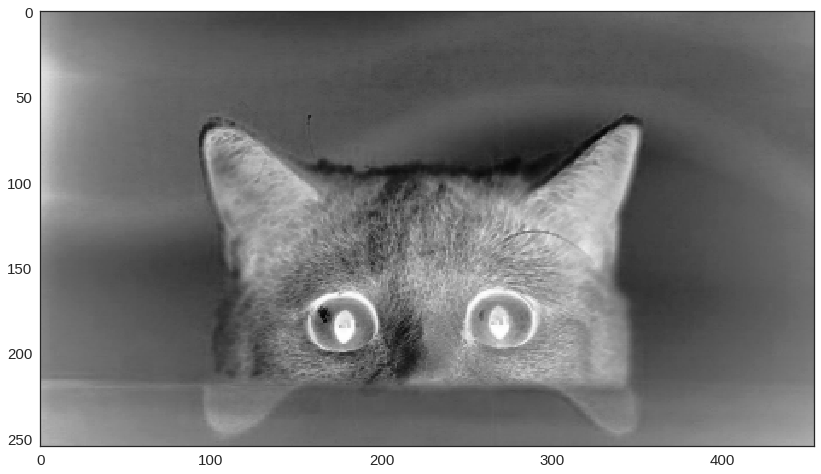

In [70]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

pretty_print_cat(model, cat)

(255, 454, 3)


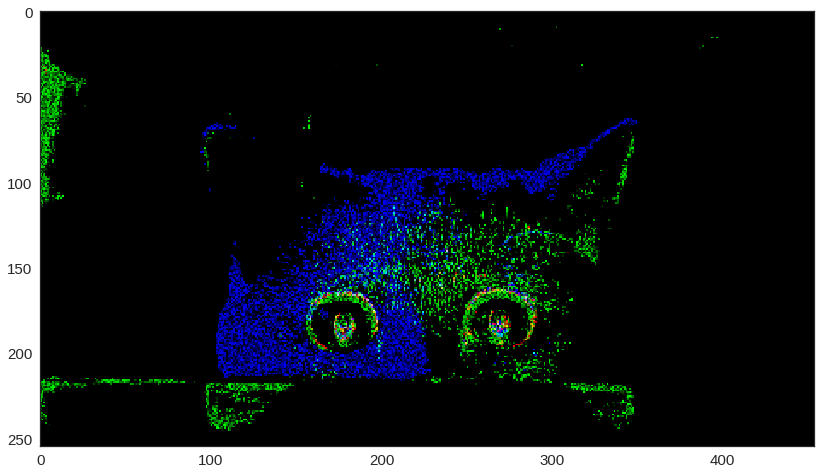

In [75]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

visualize_cat(model, cat)

# Going deeper

(84, 150, 1)
(84, 150)


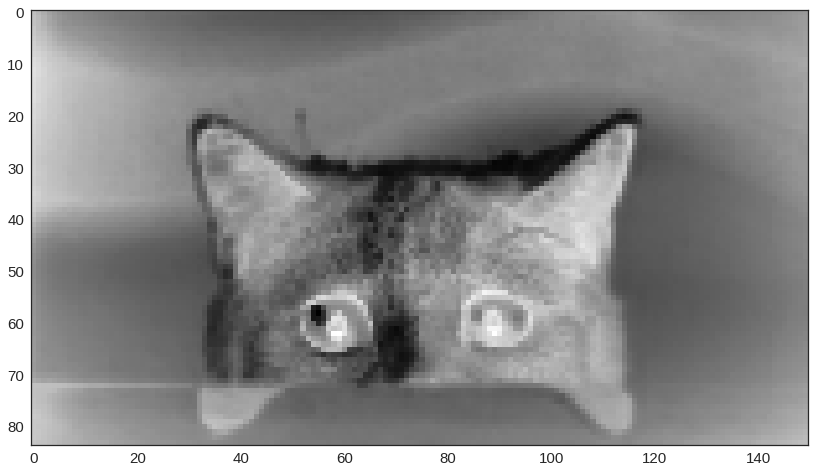

In [76]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Conv2D(1,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

pretty_print_cat(model, cat)

(126, 226, 3)


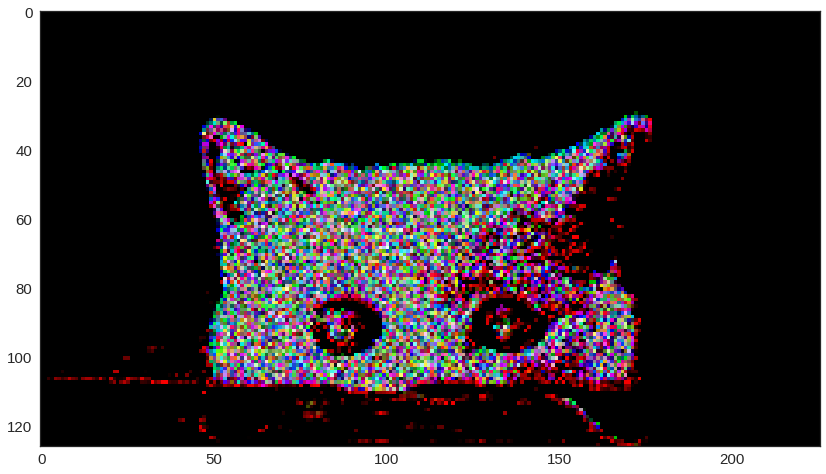

In [79]:
# 3 filters in both conv layers
model = Sequential()
model.add(Conv2D(3,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(3,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_cat(model, cat)

# Loading MNIST data

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

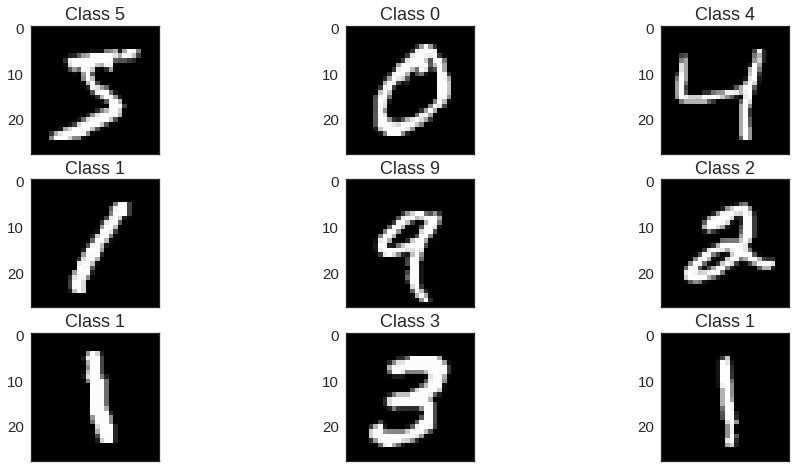

In [21]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.title("Class {}".format(y_train[i]))

# Preprocessing

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [23]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [24]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Bias & Variance

![Bias-Variance Tradeoff](http://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

## High Variance

![High Variance](https://followthedata.files.wordpress.com/2012/06/screen-shot-2012-06-02-at-21-30-03.png)

We use the same model with really reduced dataset:

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name="conv_1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="max_pool_1"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train[:100], y_train[:100],
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(X_test, y_test)).history
predictions = model.predict(X_test)

Train on 100 samples, validate on 10000 samples
Epoch 1/30
100/100 [==============================] - 0s - loss: 2.2944 - acc: 0.1400 - val_loss: 2.2497 - val_acc: 0.2518
Epoch 2/30
100/100 [==============================] - 0s - loss: 2.2088 - acc: 0.2600 - val_loss: 2.2017 - val_acc: 0.3522
Epoch 3/30
100/100 [==============================] - 0s - loss: 2.1371 - acc: 0.4000 - val_loss: 2.1453 - val_acc: 0.3500
Epoch 4/30
100/100 [==============================] - 0s - loss: 2.0232 - acc: 0.4800 - val_loss: 2.0700 - val_acc: 0.4106
Epoch 5/30
100/100 [==============================] - 0s - loss: 1.9358 - acc: 0.5000 - val_loss: 1.9712 - val_acc: 0.4835
Epoch 6/30
100/100 [==============================] - 0s - loss: 1.7756 - acc: 0.5900 - val_loss: 1.8549 - val_acc: 0.5215
Epoch 7/30
100/100 [==============================] - 0s - loss: 1.5995 - acc: 0.6400 - val_loss: 1.7412 - val_acc: 0.5412
Epoch 8/30
100/100 [==============================] - 0s - loss: 1.4332 - acc: 0.6500 - val

In [26]:
def plot_training_history(history, true_class, y_pred):

    fig, ax = plt.subplots()
    ax.plot(history['loss'])
    ax.plot(history['val_loss'])
    ax.hlines(0.05, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Desired accuracy")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(ymin=0)
    plt.legend(['train', 'test', 'Desired accuracy'], loc='upper right', bbox_to_anchor=(1.20, 1), ncol=1);
    plt.show();
    
    fig, ax = plt.subplots()
    ax.plot(history['acc'])
    ax.plot(history['val_acc'])
    ax.hlines(0.99, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Desired accuracy")
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(ymin=0)
    plt.legend(['train', 'test', 'Desired accuracy'], loc='upper right', bbox_to_anchor=(1.20, 1), ncol=1);
    plt.show();
    
    conf_matrix = confusion_matrix(np.argmax(true_class, axis=1), np.argmax(y_pred, axis=1))
    
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(conf_matrix, xticklabels=range(10), yticklabels=range(10), annot=True, fmt="d", ax=ax);
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show();

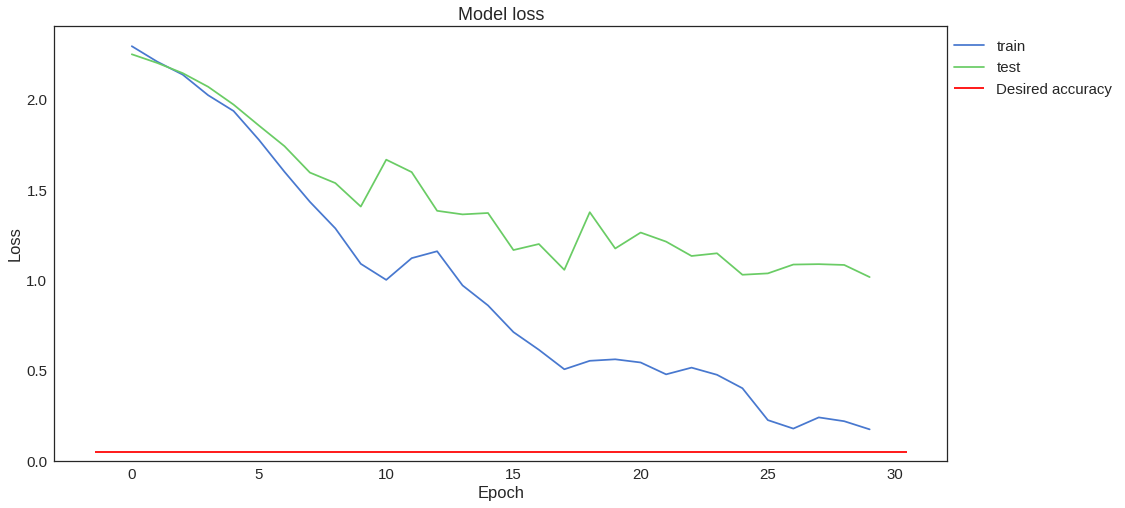

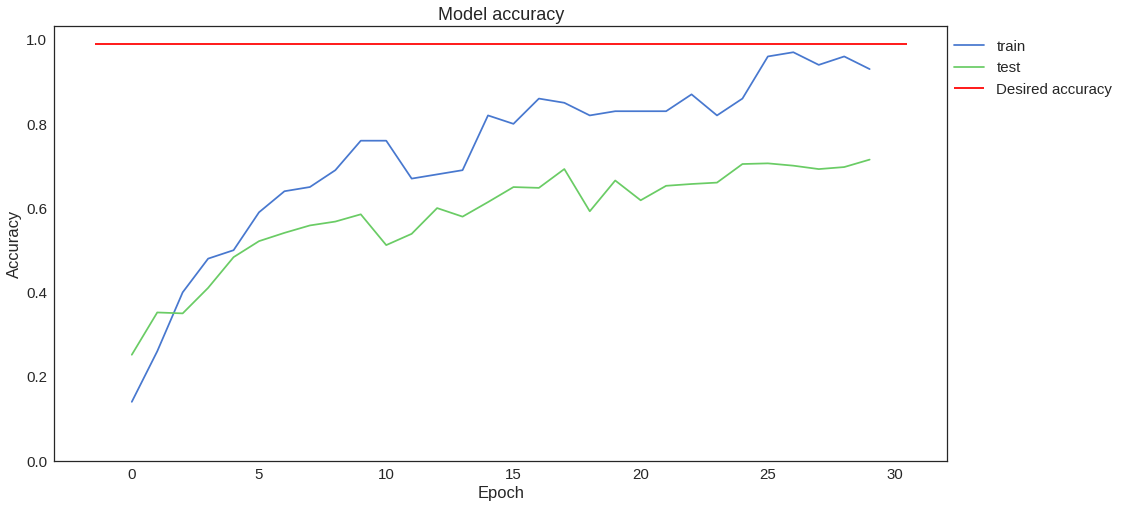

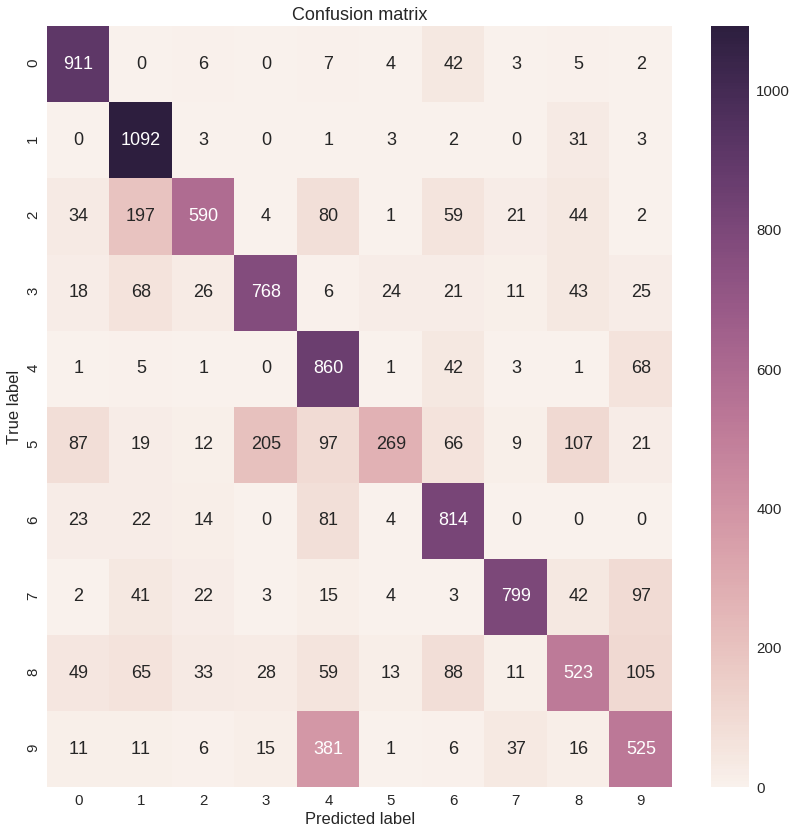

In [27]:
plot_training_history(history, y_test, predictions)

## High Bias

![High Bias](https://followthedata.files.wordpress.com/2012/06/screen-shot-2012-06-02-at-21-31-03.png)



In [28]:
X_train_mlp = X_train.reshape(60000, 784)
X_test_mlp = X_test.reshape(10000, 784)

model = Sequential()
model.add(Dense(1, input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train_mlp, y_train, 
                    batch_size=batch_size, epochs=30, verbose=1, 
                    validation_data=(X_test_mlp, y_test)).history
predictions = model.predict(X_test_mlp)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s - loss: 2.0390 - acc: 0.2106 - val_loss: 1.8891 - val_acc: 0.2251
Epoch 2/30
60000/60000 [==============================] - 1s - loss: 1.8516 - acc: 0.2433 - val_loss: 1.8039 - val_acc: 0.2595
Epoch 3/30
60000/60000 [==============================] - 1s - loss: 1.7890 - acc: 0.2784 - val_loss: 1.7549 - val_acc: 0.2918
Epoch 4/30
60000/60000 [==============================] - 1s - loss: 1.7489 - acc: 0.3083 - val_loss: 1.7194 - val_acc: 0.3153
Epoch 5/30
60000/60000 [==============================] - 1s - loss: 1.7192 - acc: 0.3319 - val_loss: 1.6926 - val_acc: 0.3332
Epoch 6/30
60000/60000 [==============================] - 1s - loss: 1.6960 - acc: 0.3429 - val_loss: 1.6708 - val_acc: 0.3381
Epoch 7/30
60000/60000 [==============================] - 1s - loss: 1.6772 - acc: 0.3445 - val_loss: 1.6528 - val_acc: 0.3416
Epoch 8/30
60000/60000 [==============================] - 1s 

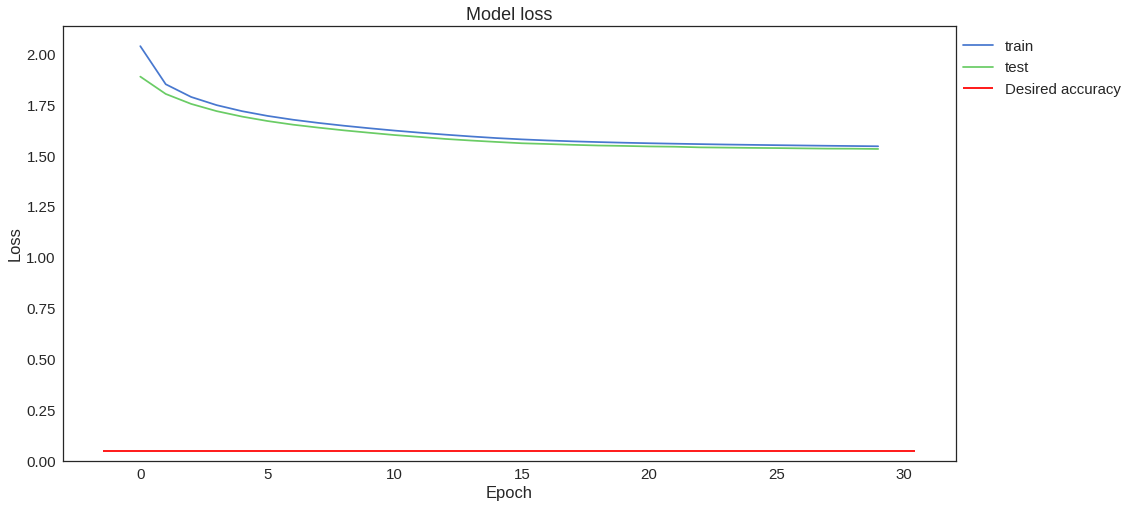

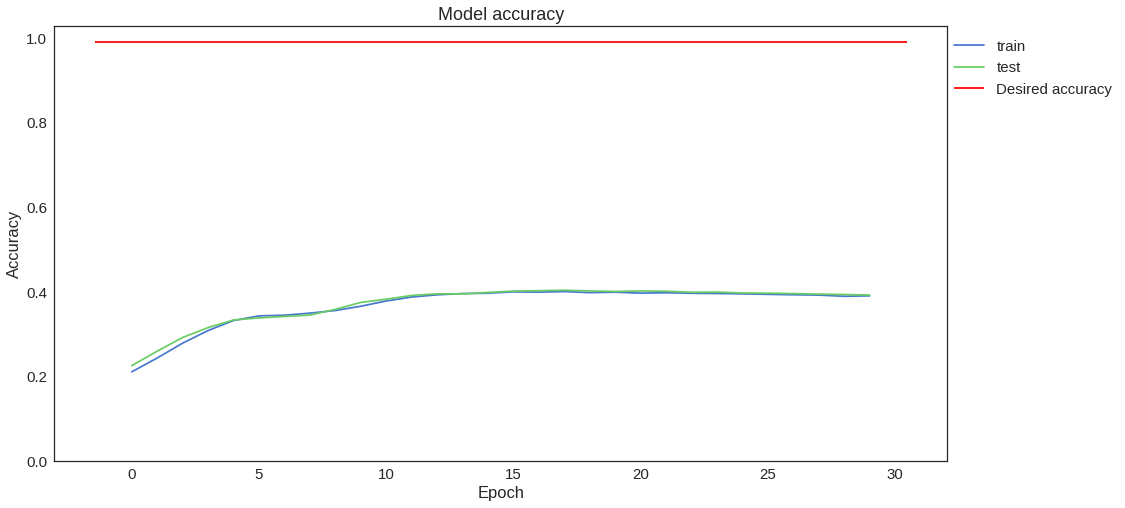

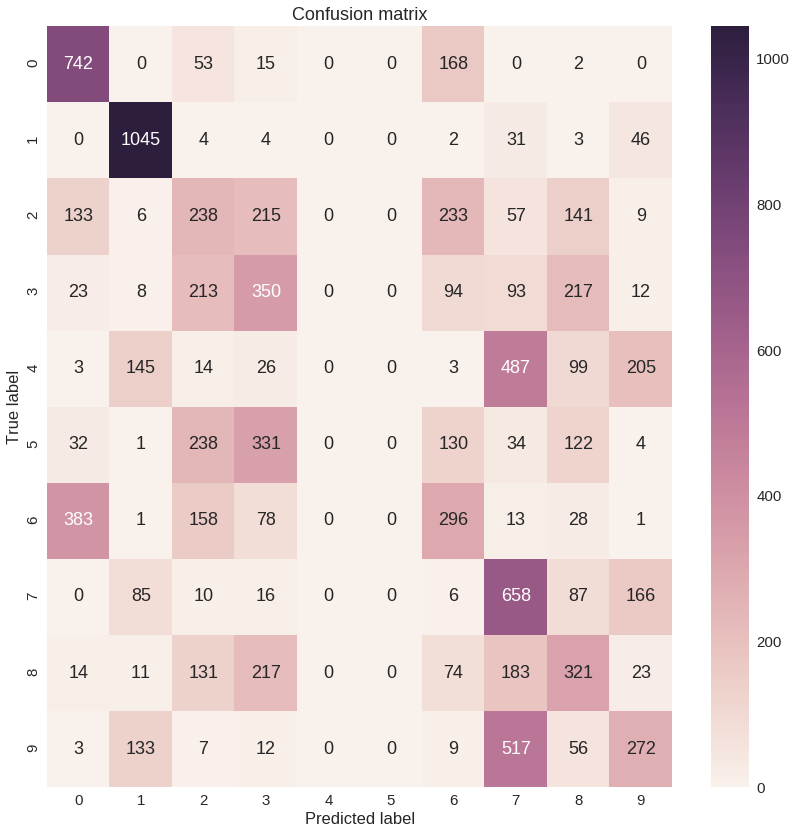

In [29]:
plot_training_history(history, y_test, predictions)

## Over and under fitting

![Over & Under fitting](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

> At its root, dealing with bias and variance is really about dealing with over- and under-fitting. Bias is reduced and variance is increased in relation to model complexity. As more and more parameters are added to a model, the complexity of the model rises and variance becomes our primary concern while bias steadily falls. - **Scott Fortmann-Roe**

# Hyperparameter optimization

In [30]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [31]:
def create_model(n_neurons, activation):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(784,), activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

In [32]:
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=batch_size, verbose=0)

n_neurons = [10, 20, 30]
activation = ['relu', 'tanh']
param_grid = dict(n_neurons=n_neurons, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(X_train_mlp, y_train)

In [33]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.915417 using {'activation': 'tanh', 'n_neurons': 30}
0.892300 (0.001633) with: {'activation': 'relu', 'n_neurons': 10}
0.911533 (0.000833) with: {'activation': 'relu', 'n_neurons': 20}
0.915400 (0.002900) with: {'activation': 'relu', 'n_neurons': 30}
0.887883 (0.002483) with: {'activation': 'tanh', 'n_neurons': 10}
0.907250 (0.001383) with: {'activation': 'tanh', 'n_neurons': 20}
0.915417 (0.000483) with: {'activation': 'tanh', 'n_neurons': 30}


# Visualizing CNN

In [34]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    return layer_dict[layer_name].output

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def visualize_layer(model, layer_name, cat):
    
    layer = get_output_layer(model, layer_name)
    
    input_img = model.input
    input_img_data = np.expand_dims(cat.copy().reshape(28, 28, 1), axis=0)

    kept_filters = []
    for filter_index in range(0, int(layer.shape[-1])):
        loss = K.mean(layer[:, :, :, filter_index])
        grads = K.gradients(loss, input_img)[0]

        iterate = K.function([input_img], [loss, grads])

        # step size for gradient ascent
        step = 1.

        # we run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step

            if loss_value <= 0.:
                # some filters get stuck to 0, we can skip them
                break

        if loss_value > 0:
            img = deprocess_image(input_img_data[0])
            kept_filters.append((img, loss_value))
            
    n = 4

    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top 64 filters.
    kept_filters.sort(key=lambda x: x[1], reverse=True)
    kept_filters = kept_filters[:n * n]
    
    margin = 5
    width = n * img_cols + (n - 1) * margin
    height = n * img_rows + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 1))
    
    
    for i in range(n):
        for j in range(n):
            img, loss = kept_filters[i * n + j]
            stitched_filters[(img_cols + margin) * i: (img_cols + margin) * i + img_cols,
                             (img_rows + margin) * j: (img_rows + margin) * j + img_rows, :] = img
            
    plt.imshow(stitched_filters.reshape(127, 127), cmap='gray', interpolation='none');

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name="conv_1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="max_pool_1"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [36]:
def plot_digit(cat):
    plt.imshow(cat, cmap='gray', interpolation='none');

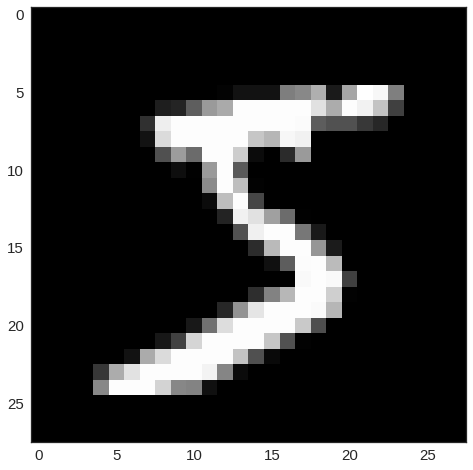

In [37]:
plot_digit(X_train[0].reshape(28, 28))

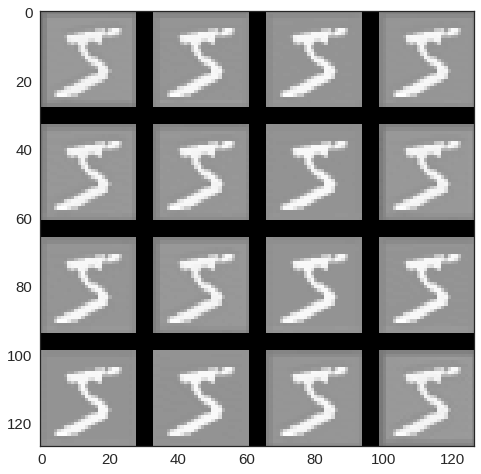

In [38]:
visualize_layer(model, "conv_1", X_train[0])

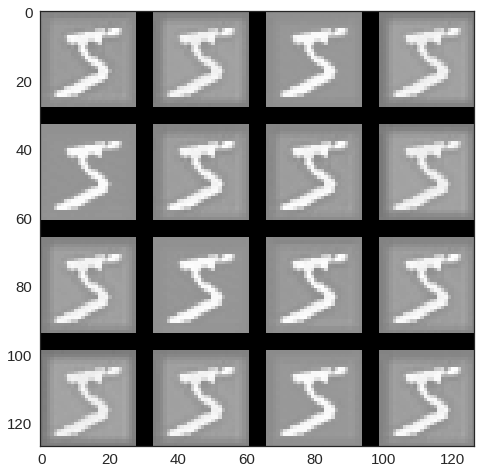

In [39]:
visualize_layer(model, "conv_2", X_train[0])

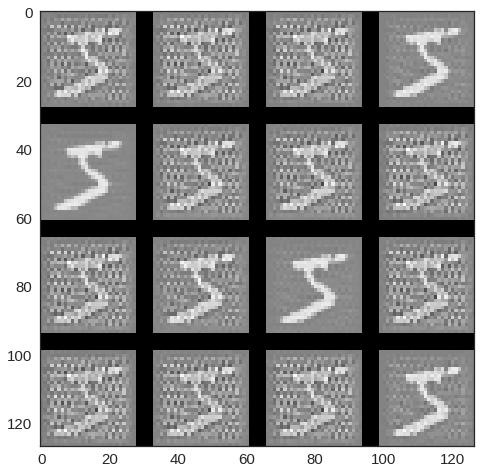

In [40]:
visualize_layer(model, "max_pool_1", X_train[0])

# Training

In [41]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test)).history
predictions = model.predict(X_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s - loss: 0.3314 - acc: 0.8991 - val_loss: 0.0776 - val_acc: 0.9753
Epoch 2/12
60000/60000 [==============================] - 5s - loss: 0.1136 - acc: 0.9671 - val_loss: 0.0539 - val_acc: 0.9830
Epoch 3/12
60000/60000 [==============================] - 5s - loss: 0.0851 - acc: 0.9745 - val_loss: 0.0428 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 5s - loss: 0.0734 - acc: 0.9787 - val_loss: 0.0425 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 5s - loss: 0.0636 - acc: 0.9807 - val_loss: 0.0380 - val_acc: 0.9877
Epoch 6/12
60000/60000 [==============================] - 5s - loss: 0.0553 - acc: 0.9833 - val_loss: 0.0328 - val_acc: 0.9896
Epoch 7/12
60000/60000 [==============================] - 5s - loss: 0.0505 - acc: 0.9853 - val_loss: 0.0328 - val_acc: 0.9895
Epoch 8/12
60000/60000 [==============================] - 5s 

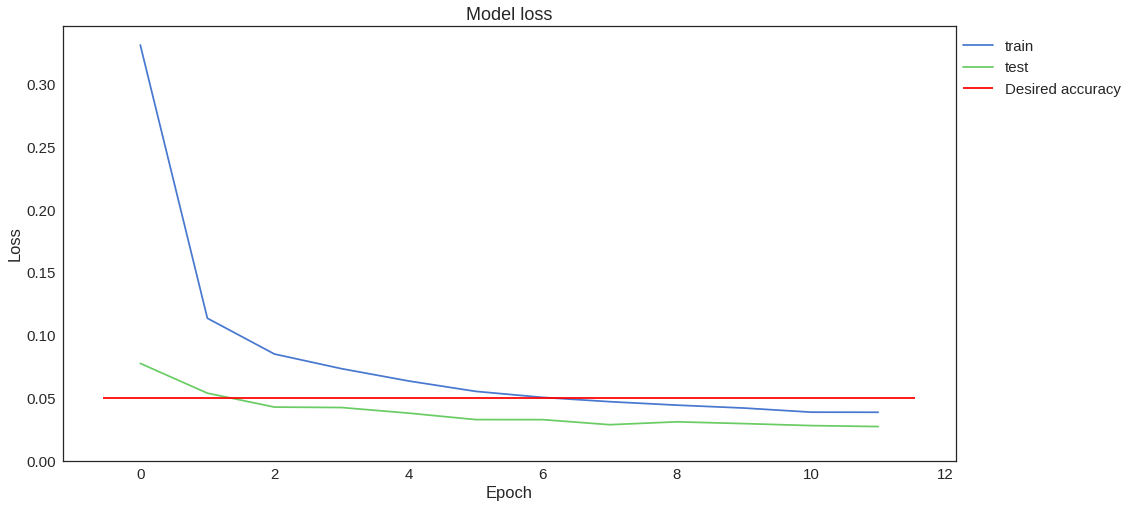

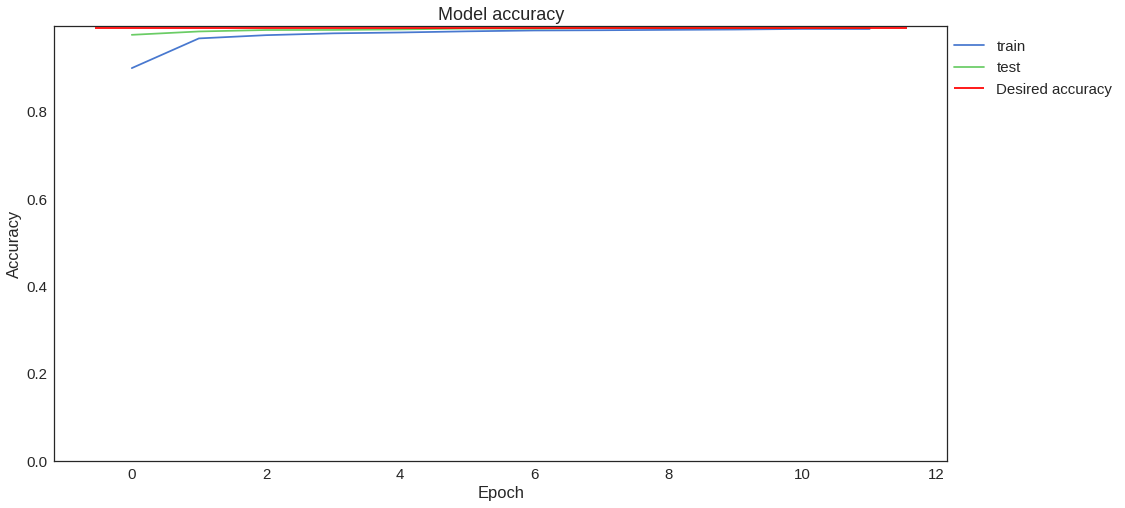

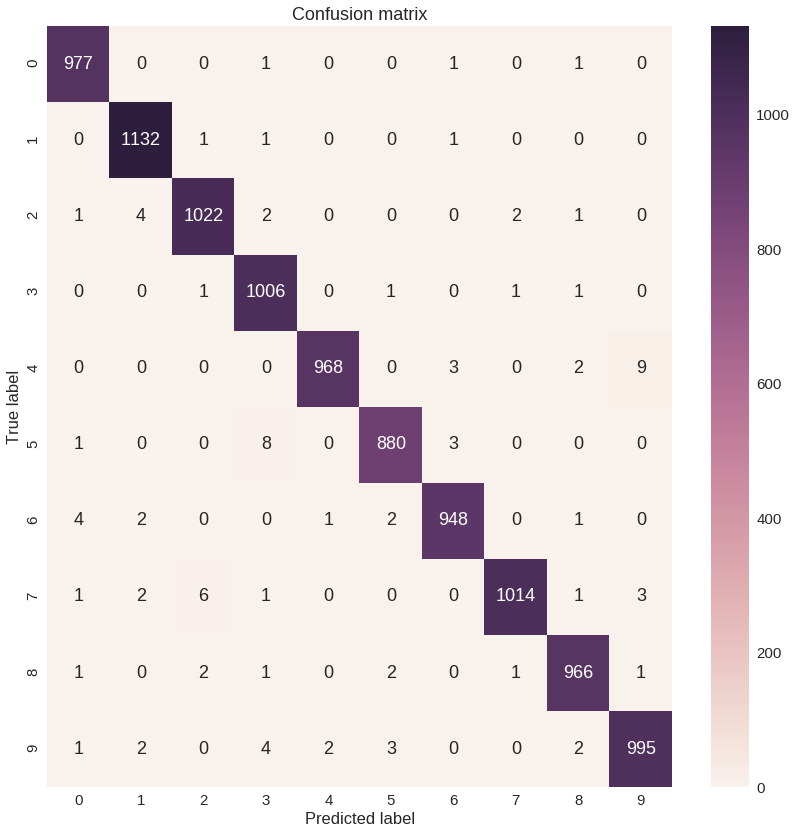

In [42]:
plot_training_history(history, y_test, predictions)

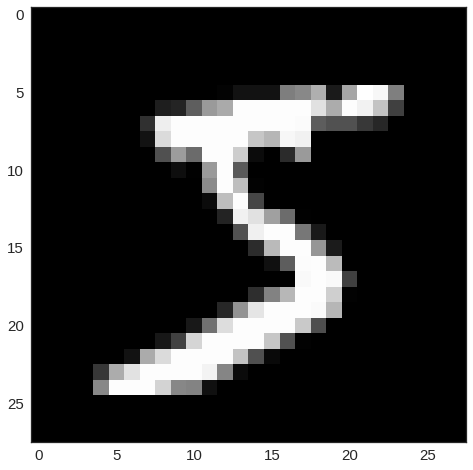

In [43]:
plot_digit(X_train[0].reshape(28, 28))

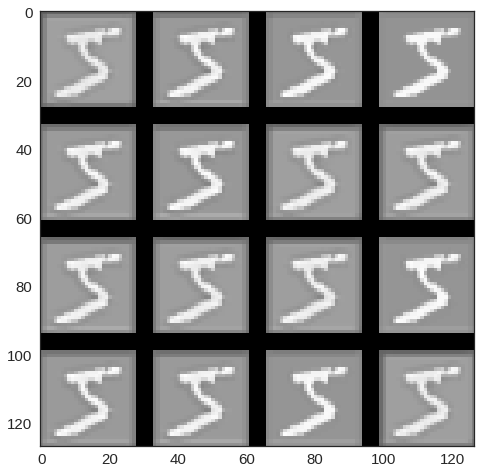

In [44]:
visualize_layer(model, "conv_1", X_train[0])

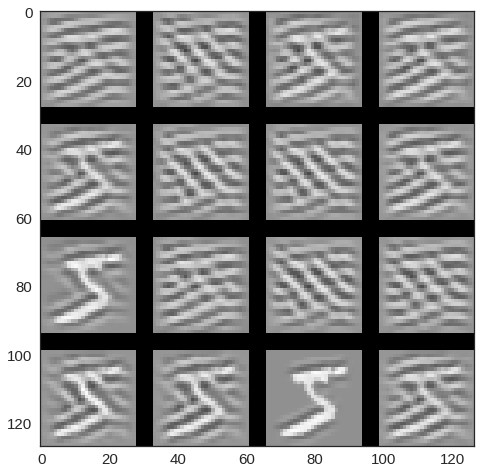

In [45]:
visualize_layer(model, "conv_2", X_train[0])

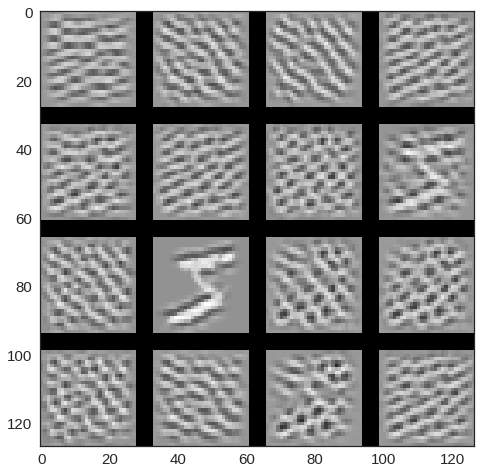

In [46]:
visualize_layer(model, "max_pool_1", X_train[0])

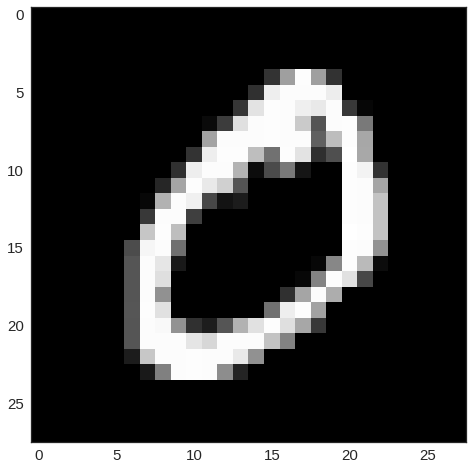

In [47]:
plot_digit(X_train[1].reshape(28, 28))

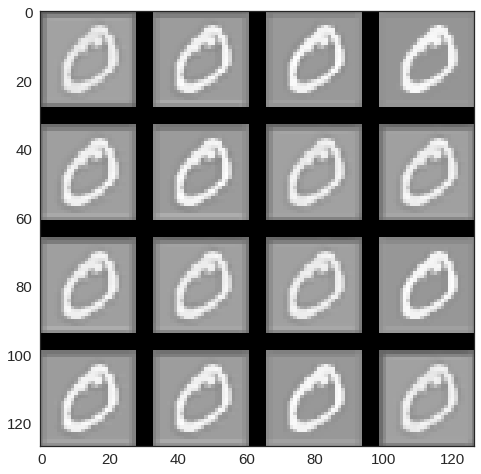

In [48]:
visualize_layer(model, "conv_1", X_train[1])

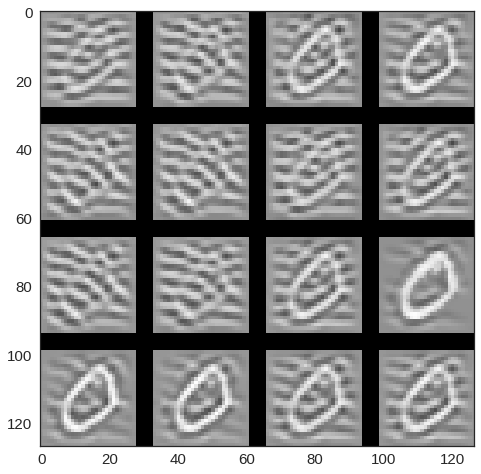

In [49]:
visualize_layer(model, "conv_2", X_train[1])

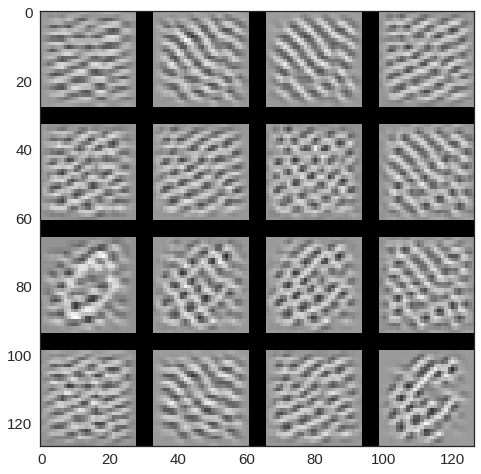

In [50]:
visualize_layer(model, "max_pool_1", X_train[1])

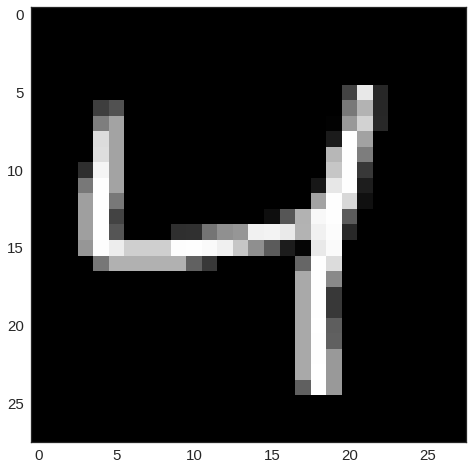

In [51]:
plot_digit(X_train[2].reshape(28, 28))

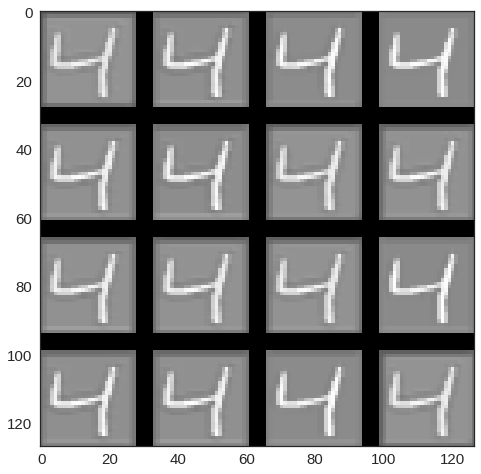

In [52]:
visualize_layer(model, "conv_1", X_train[2])

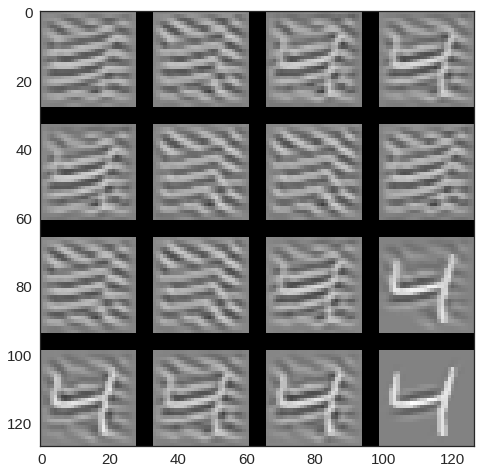

In [53]:
visualize_layer(model, "conv_2", X_train[2])

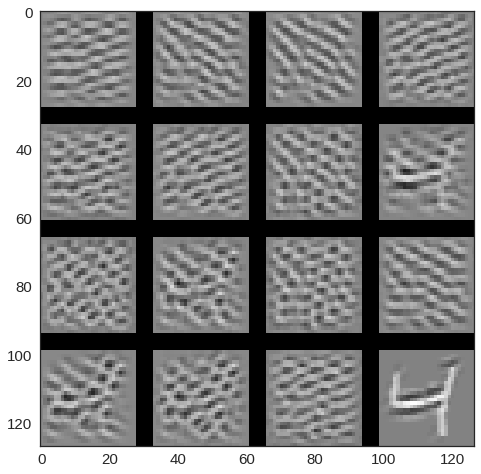

In [54]:
visualize_layer(model, "max_pool_1", X_train[2])